# A bit more Feature Engineering
Помимо полученных из внешних источников, были добавлены следующие признаки:
- население города
- является ли город миллионником *(добавляли, стало совсем не важной фичей)*
- является ли столицей или Северной Столицей
- population, salary, population_density, happy_index

In [444]:
from pathlib import Path
import requests
import pandas as pd

url = ("https://raw.githubusercontent.com/"
      "epogrebnyak/ru-cities/main/assets/alt_city_names.json")

# save file locally
p = Path("alt_city_names.json")
if not p.exists():
    content = requests.get(url).text
    p.write_text(content, encoding="utf-8")

# read as dataframe
dff = pd.read_csv("towns.csv")

from googletrans import Translator

def translate(city):
    translator = Translator()
    translated_text = translator.translate(city)
    return translated_text.text

dff['eng'] = dff['city'].apply(lambda x: translate(x))



In [ ]:
# to add
df.merge(dff[['eng', 'population']], how='left', left_on='cities', right_on='eng').drop(columns=['eng'])

df['population'].fillna(min(df['population']), inplace=True)

# Модели ML

In [640]:
import pandas as pd
import numpy as np

In [641]:
df = pd.read_csv('../data/expanded_data_with_OSM.csv', sep = ',')
df_target = pd.read_csv('../data/train.csv', sep = ',')

regions_data = pd.read_csv('../data/regions_data.csv', sep = ';').rename(columns={'Unnamed: 0': 'regions'})
df = df.merge(regions_data, how='left', on='regions')

df = df.merge(df_target[['id', 'target']], how='left', on='id')

In [642]:
df.describe()

,id,atm_group,lat,lng,distance_to_fast_food,distance_to_clothes,distance_to_vending_parking,distance_to_cafe,distance_to_pharmacy,distance_to_atm,...,distance_to_parking,distance_to_parking_underground,cnt_apart_200m,cnt_banks_200m,cnt_atm_200m,population,salary,population_density,happy_index,target
count,8345.000000,8345.000000,8345.000000,8345.000000,7627.000000,7656.000000,2006.000000,8039.000000,8020.000000,7876.000000,...,7460.000000,3446.000000,8345.000000,8345.000000,8345.000000,8.343000e+03,8343.000000,8343.000000,8343.000000,5957.000000
mean,4412.909227,4405.440024,54.138304,63.500873,974.398453,1126.367711,3114.097863,800.755020,588.162113,689.645493,...,1759.262574,3509.705348,5.905692,0.968844,1.278490,2.373183e+07,48165.475968,27.012210,80.850533,0.000735
std,2542.997777,2443.152067,4.329293,32.787366,1471.802539,1545.366563,2879.151832,1255.423507,988.169313,1215.363205,...,1885.221998,2525.030531,6.340366,1.507090,2.262835,1.161874e+07,8379.339054,24.026884,2.911065,0.086220
min,1.000000,32.000000,42.057080,19.941530,0.000000,0.000000,21.102462,0.000000,0.000000,0.000000,...,25.136211,6.818753,0.000000,0.000000,0.000000,8.124053e+06,24399.000000,1.168499,76.000000,-0.145001
25%,2226.000000,1942.000000,52.243997,37.851107,160.864343,194.185094,556.698057,150.445029,124.883215,60.074594,...,515.252329,1443.623461,0.000000,0.000000,0.000000,1.394196e+07,42845.000000,3.778890,80.000000,-0.061486
50%,4401.000000,5478.000000,55.060936,49.071694,451.854329,550.210028,2175.261180,376.765176,286.370488,265.316907,...,1132.012590,2914.218594,4.000000,0.000000,0.000000,1.700393e+07,44500.000000,28.034260,80.000000,-0.015589
75%,6605.000000,5478.000000,56.116673,84.950218,1157.927365,1373.754919,5197.360775,900.759650,621.104264,755.077114,...,2229.316664,5122.183412,10.000000,1.000000,2.000000,3.925096e+07,60000.000000,60.367053,84.000000,0.040243
max,8811.000000,8083.000000,69.495093,173.706490,9990.876014,9936.217504,9931.143303,9916.390589,9932.269371,9934.011760,...,9976.999178,9956.745817,53.000000,13.000000,25.000000,3.925096e+07,60000.000000,60.367053,86.000000,0.218608


In [643]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8345 entries, 0 to 8344
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               8345 non-null   float64
 1   atm_group                        8345 non-null   float64
 2   address                          8345 non-null   object 
 3   address_rus                      8345 non-null   object 
 4   lat                              8345 non-null   float64
 5   lng                              8345 non-null   float64
 6   test_train_flag                  8345 non-null   object 
 7   geometry                         8345 non-null   object 
 8   distance_to_fast_food            7627 non-null   float64
 9   distance_to_clothes              7656 non-null   float64
 10  distance_to_vending_parking      2006 non-null   float64
 11  distance_to_cafe                 8039 non-null   float64
 12  distance_to_pharmacy

In [644]:
df.regions.value_counts()

Central Federal District            2366
Siberian Federal District           1646
Volga Federal District              1531
Far Eastern Federal District        1135
Northwestern Federal District        580
Southern Federal District            517
Ural Federal District                483
North Caucasian Federal District      85
Name: regions, dtype: int64

### Заполняем пропуски максимальными значениями

In [645]:
dff = pd.DataFrame(df.isna().sum()/len(df)).reset_index()
dff = dff[dff[0] > 0]

for col in dff[dff[0] > 0]['index']:
    if col != 'regions':
        df[col] = df[col].fillna(df[col].max())

df['regions'].replace(np.nan, 'Southern Federal District', inplace=True)

OneHotEncoding для категориальных фичей

In [646]:
df = df[df['test_train_flag'] == 'train']
df['capital'] = np.where((df['cities'] == 'Moscow') | (df['cities'] == 'Saint Petersburg'), 1, 0)

In [647]:
df = df.merge(df.groupby('cities').agg({'target': 'mean'}).reset_index().rename(columns={'target': 'avgC'}),
         how='left', on='cities')

df = df.merge(df.groupby('regions').agg({'target': 'mean'}).reset_index().rename(columns={'target': 'avgR'}),
         how='left', on='regions')

df = df.merge(df.groupby('states').agg({'target': 'mean'}).reset_index().rename(columns={'target': 'avgS'}),
         how='left', on='states')

df = df.merge(df.groupby('atm_group').agg({'target': 'mean'}).reset_index().rename(columns={'target': 'avgA'}),
         how='left', on='atm_group')


In [648]:
df['atm_group'] = df['atm_group'].astype(int)
df = pd.get_dummies(df, columns=['atm_group'], drop_first=True) 
df = df.iloc[:, 7:]
df.drop(columns=['cities'], inplace=True)
X = pd.get_dummies(df, drop_first=True) 

y = X['target'].reset_index(drop=True)
X = X.loc[:, X.columns != 'target'].reset_index(drop=True)

## Модели

In [649]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error as MSE, mean_absolute_percentage_error as MAPE
from sklearn.preprocessing import StandardScaler
from category_encoders.leave_one_out import LeaveOneOutEncoder
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_regression, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

### Разбиваем на train и test

In [650]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Стандартизация признаков

In [651]:
normalizer = StandardScaler()
X_real_norm_np = normalizer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_real_norm_np)

normalizer = StandardScaler()
X_real_norm_np = normalizer.fit_transform(X_test)
X_test = pd.DataFrame(data=X_real_norm_np)

### Linear Regression

In [652]:
lr = LinearRegression()

lr.fit(X_train, y_train)

lr_train = lr.predict(X_train)
lr_test = lr.predict(X_test)

lr_r2_train = r2_score(y_train, lr_train)
lr_mse_train = MSE(y_train, lr_train)
lr_rmse_train = MSE(y_train, lr_train, squared=False)
# lr_mape_train = MAPE(y_train, lr_train)

lr_r2_test = r2_score(y_test, lr_test)
lr_mse_test = MSE(y_test, lr_test)
lr_rmse_test = MSE(y_test, lr_test, squared=False)
# lr_mape_test = MAPE(y_test, lr_test)

print(f"TRAIN: R2: {lr_r2_train}, MSE: {lr_mse_train}, \
RMSE: {lr_rmse_train}\n")
print(f"TEST: R2: {lr_r2_test}, MSE: {lr_mse_test }, \
RMSE: {lr_rmse_test }")


TRAIN: R2: 0.7470835314258155, MSE: 0.001877775626406798, RMSE: 0.04333330850981492

TEST: R2: -8.082251793708222e+20, MSE: 6.025976469641977e+18, RMSE: 2454786440.7402077


### Ridge (L2-регуляризация)

In [653]:
ridge = Ridge()

ridge.fit(X_train, y_train)

ridge_train = ridge.predict(X_train)
ridge_test = ridge.predict(X_test)

ridge_r2_train = r2_score(y_train, ridge_train)
ridge_mse_train = MSE(y_train, ridge_train)
ridge_rmse_train = MSE(y_train, ridge_train, squared=False)
# ridge_mape_train = MAPE(y_train, ridge_train)

ridge_r2_test = r2_score(y_test, ridge_test)
ridge_mse_test = MSE(y_test, ridge_test)
ridge_rmse_test = MSE(y_test, ridge_test, squared=False)
# ridge_mape_test = MAPE(y_test, ridge_test)

print(f"TRAIN: R2: {ridge_r2_train}, MSE: {ridge_mse_train}, \
RMSE: {ridge_rmse_train}\n")
print(f"TEST: R2: {ridge_r2_test}, MSE: {ridge_mse_test}, \
RMSE: {ridge_rmse_test}")

# model.coef_

TRAIN: R2: 0.7470834420675241, MSE: 0.001877776289846481, RMSE: 0.043333316164891895

TEST: R2: 0.7285110769903769, MSE: 0.0020241708667106794, RMSE: 0.044990786464682735


### ElasticNet с GridSearchCV

In [654]:
params = {'alpha': np.arange(1, 10, 1), 'l1_ratio': np.arange(0, 1.1, 0.1)}
en = GridSearchCV(ElasticNet(), param_grid=params, cv=10, n_jobs=-1)

en.fit(X_train, y_train)

en_train = en.predict(X_train)
en_test = en.predict(X_test)

en_r2_train = r2_score(y_train, en_train)
en_mse_train = MSE(y_train, en_train)
en_rmse_train = MSE(y_train, en_train, squared=False)
# en_mape_train = MAPE(y_train, en_train)

en_r2_test = r2_score(y_test, en_test)
en_mse_test = MSE(y_test, en_test)
en_rmse_test = MSE(y_test, en_test, squared=False)
# en_mape_test = MAPE(y_test, en_test)

print(f"TRAIN: R2: {en_r2_train}, MSE: {en_mse_train}, \
RMSE: {en_rmse_train}\n")
print(f"TEST: R2: {en_r2_test}, MSE: {en_mse_train}, \
RMSE: {en_rmse_test}")

TRAIN: R2: 0.6804004845040941, MSE: 0.0023728631978490733, RMSE: 0.04871204366323664

TEST: R2: 0.6614401037284483, MSE: 0.0023728631978490733, RMSE: 0.05024181084226482


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.611e+00, tolerance: 3.317e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


### Отбор признаков для линейных моделей
посмотрим, в какую сторону повлияет выбрасывание нескольких признаков

In [655]:
params = {'alpha': np.arange(1, 10, 1), 'l1_ratio': np.arange(0, 1.1, 0.1)}

pipe = Pipeline([
    ('scaler_', StandardScaler()),
    ('selector_', SelectKBest(score_func=f_regression, k=100)), 
    ('model_', Ridge())]
)

cv_res = cross_validate(pipe, X, y, cv=5, scoring='r2', return_train_score=True)
cv_res['test_score'].mean()

0.7315095561516402

In [658]:
params = {'alpha': np.arange(1, 10, 1), 'l1_ratio': np.arange(0, 1.1, 0.1)}

pipe = Pipeline([
    ('scaler_', StandardScaler()),
    ('selector_', SelectKBest(score_func=f_regression, k=50)), 
    ('model_', Ridge())]
)

cv_res = cross_validate(pipe, X, y, cv=5, scoring='r2', return_train_score=True)
cv_res['test_score'].mean()

0.7324062682342403

In [668]:
params = {'alpha': np.arange(1, 10, 1), 'l1_ratio': np.arange(0, 1.1, 0.1)}

pipe = Pipeline([
    ('scaler_', StandardScaler()),
    ('selector_', PCA(n_components=100)), 
    ('model_', Ridge())]
)

cv_res = cross_validate(pipe, X, y, cv=5, scoring='r2', return_train_score=True)
cv_res['test_score'].mean()

0.7243884871135824

### Дерево решений

In [661]:
tree = DecisionTreeRegressor()

tree.fit(X_train, y_train)

tree_train = tree.predict(X_train)
tree_test = tree.predict(X_test)

tree_r2_train = r2_score(y_train, tree_train)
tree_mse_train = MSE(y_train, tree_train)
tree_rmse_train = MSE(y_train, tree_train, squared=False)
# tree_mape_train = MAPE(y_train, tree_train)

tree_r2_test = r2_score(y_test, tree_test)
tree_mse_test = MSE(y_test, tree_test)
tree_rmse_test = MSE(y_test, tree_test, squared=False)
# tree_mape_test = MAPE(y_test, tree_test)


print(f"TRAIN: R2: {tree_r2_train}, MSE: {tree_mse_train}, \
RMSE: {tree_rmse_train}\n")
print(f"TEST: R2: {tree_r2_test}, MSE: {tree_mse_test}, \
RMSE: {tree_rmse_test}")

TRAIN: R2: 0.98784588750499, MSE: 9.02380787316815e-05, RMSE: 0.009499372544104242

TEST: R2: 0.511686901590468, MSE: 0.0036407715522108566, RMSE: 0.06033880635387857


### Дерево решений с GridSearchCV

In [660]:
params = {'max_depth' : np.arange(3, 10, 1),
          'max_features' : ["auto", "sqrt", "log2"],
          'min_samples_leaf': np.arange(3, 8, 1)}

gs_tree = GridSearchCV(DecisionTreeRegressor(), params, cv=5, scoring='r2')

gs_tree.fit(X_train, y_train)

gs_tree_train = gs_tree.predict(X_train)
gs_tree_test = gs_tree.predict(X_test)

gs_tree_r2_train = r2_score(y_train, gs_tree_train)
gs_tree_mse_train = MSE(y_train, gs_tree_train)
gs_tree_rmse_train = MSE(y_train, gs_tree_train, squared=False)
# gs_tree_mape_train = MAPE(y_train, gs_tree_train)

gs_tree_r2_test = r2_score(y_test, gs_tree_test)
gs_tree_mse_test = MSE(y_test, gs_tree_test)
gs_tree_rmse_test = MSE(y_test, gs_tree_test, squared=False)
# gs_tree_mape_test = MAPE(y_test, gs_tree_test)

print(f"TRAIN: R2: {gs_tree_r2_train}, MSE: {gs_tree_mse_train}, \
RMSE: {gs_tree_rmse_train}\n")
print(f"TEST: R2: {gs_tree_r2_test}, MSE: {gs_tree_mse_test}, \
RMSE: {gs_tree_rmse_test}")

C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anacon

C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anacon

C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anacon

C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anacon

C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anacon

C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\User\anacon

TRAIN: R2: 0.738423809229721, MSE: 0.0019420696415927278, RMSE: 0.04406891922424157

TEST: R2: 0.7309689577508429, MSE: 0.0020058453653457203, RMSE: 0.04478666503933643


### Метод ближайших соседей

In [662]:
knn = KNeighborsRegressor(n_neighbors=10) #лучший результат достигается с 10-ю соседями
knn.fit(X_train, y_train)

knn_train = knn.predict(X_train)
knn_test = knn.predict(X_test)

knn_r2_train = r2_score(y_train, knn_train)
knn_mse_train = MSE(y_train, knn_train)
knn_rmse_train = MSE(y_train, knn_train, squared=False)
# knn_mape_train = MAPE(y_train, knn_train)

knn_r2_test = r2_score(y_test, knn_test)
knn_mse_test = MSE(y_test, knn_test)
knn_rmse_test = MSE(y_test, knn_test, squared=False)
# knn_mape_test = MAPE(y_test, knn_test)

print(f"TRAIN: R2: {knn_r2_train}, MSE: {knn_mse_train}, \
RMSE: {knn_rmse_train}\n")
print(f"TEST: R2: {knn_r2_test}, MSE: {knn_mse_train}, \
RMSE: {knn_rmse_test}")


TRAIN: R2: 0.6387577163851472, MSE: 0.002682039486094345, RMSE: 0.05178841073149808

TEST: R2: 0.5416577685883318, MSE: 0.002682039486094345, RMSE: 0.058457799715421595


### Метод опорных векторов

In [663]:
svr = SVR()
svr.fit(X_train, y_train)

svr_train = svr.predict(X_train)
svr_test = svr.predict(X_test)

svr_r2_train = r2_score(y_train, svr_train)
svr_mse_train = MSE(y_train, svr_train)
svr_rmse_train = MSE(y_train, svr_train, squared=False)
# svr_mape_train = MAPE(y_train, svr_train)

svr_r2_test = r2_score(y_test, svr_test)
svr_mse_test = MSE(y_test, svr_test)
svr_rmse_test = MSE(y_test, svr_test, squared=False)
# svr_mape_test = MAPE(y_test, svr_test)

print(f"TRAIN: R2: {svr_r2_train}, MSE: {svr_mse_train}, \
RMSE: {svr_rmse_train}\n")
print(f"TEST: R2: {svr_r2_test}, MSE: {svr_mse_train}, \
RMSE: {svr_rmse_test}")


TRAIN: R2: 0.6217729853253577, MSE: 0.002808142440895774, RMSE: 0.05299190920221476

TEST: R2: 0.5772270204816117, MSE: 0.002808142440895774, RMSE: 0.05614371405064106


### Случайный лес

In [664]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_jobs=-1, warm_start=True)

rf.fit(X_train, y_train)

rf_train = rf.predict(X_train)
rf_test = rf.predict(X_test)

rf_r2_train = r2_score(y_train, rf_train)
rf_mse_train = MSE(y_train, rf_train)
rf_rmse_train = MSE(y_train, rf_train, squared=False)
rf_mape_train = MAPE(y_train, rf_train)

rf_r2_test = r2_score(y_test, rf_test)
rf_mse_test = MSE(y_test, rf_test)
rf_rmse_test = MSE(y_test, rf_test, squared=False)
rf_mape_test = MAPE(y_test, rf_test)

print(f"TRAIN: R2: {rf_r2_train}, MSE: {rf_mse_train}, \
RMSE: {rf_rmse_train}, MAPE: {rf_mape_train}\n")
print(f"TEST: R2: {rf_r2_test}, MSE: {rf_mse_test }, \
RMSE: {rf_rmse_test }, MAPE: {rf_mape_test}")


TRAIN: R2: 0.9600691786979841, MSE: 0.0002964659573417129, RMSE: 0.0172181868192244, MAPE: 1.1130792268331573

TEST: R2: 0.7833076630040641, MSE: 0.0016156177229045873, RMSE: 0.040194747454171016, MAPE: 1.8097838158155475


In [665]:
from scipy.stats import randint

param_grid = {
               'min_samples_leaf': [1, 2, 3],
#                'max_depth': randint(30, 40),
               'max_features' : ['auto', 'sqrt'],
               'max_leaf_nodes': np.arange(2600, 5000),
             }

rf_opt = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = param_grid, 
                            cv = 5, n_jobs=-1, error_score='raise')

rf_opt.fit(X_train, y_train)
pred_rf_opt_train = rf_opt.predict(X_train)
pred_rf_opt = rf_opt.predict(X_test)

rf_opt_r2_train = r2_score(y_train, pred_rf_opt_train)
rf_opt_mse_train = MSE(y_train, pred_rf_opt_train)
rf_opt_rmse_train = MSE(y_train, pred_rf_opt_train, squared=False)
rf_opt_mape_train = MAPE(y_train, pred_rf_opt_train)

rf_opt_r2_test = r2_score(y_test, pred_rf_opt)
rf_opt_mse_test = MSE(y_test, pred_rf_opt)
rf_opt_rmse_test = MSE(y_test, pred_rf_opt, squared=False)
rf_opt_mape_test = MAPE(y_test, pred_rf_opt)

print(f"TRAIN: R2: {rf_opt_r2_train}, MSE: {rf_opt_mse_train}, \
RMSE: {rf_opt_rmse_train}, MAPE: {rf_opt_mape_train}\n")
print(f"TEST: R2: {rf_opt_r2_test}, MSE: {rf_opt_mse_test }, \
RMSE: {rf_opt_rmse_test }, MAPE: {rf_opt_mape_test}")


C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


TRAIN: R2: 0.9508121621867317, MSE: 0.0003651945778070761, RMSE: 0.01911006483000715, MAPE: 1.1765007143123993

TEST: R2: 0.7824461404284386, MSE: 0.0016220410748382966, RMSE: 0.04027457106957561, MAPE: 1.8533771037699192


In [680]:
from sklearn.ensemble import StackingRegressor
estimators = [('rf', rf),
#               ('lr', lr),
#               ('cb', CatBoostRegressor())
             ]

stacked = StackingRegressor(estimators=estimators, cv=2, n_jobs=-1)

stacked.fit(X, y)

stacked_preds = stacked.predict(X_test)

stacked_r2_test = r2_score(y_test, stacked_preds)
stacked_mse_test = MSE(y_test, stacked_preds)
stacked_rmse_test = MSE(y_test, stacked_preds, squared=False)

print(f"TEST: R2: {stacked_r2_test}, MSE: {stacked_mse_test}, \
RMSE: {stacked_rmse_test}")

TEST: R2: 0.7833076630040641, MSE: 0.0016156177229045873, RMSE: 0.040194747454171016


### Catboost

In [681]:
from catboost import CatBoostRegressor, Pool

In [692]:
# import libraries
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# get the categorical and numeric column names
num_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# pipeline for numerical columns
num_pipe = make_pipeline(
#     SimpleImputer(strategy='mode'),
    StandardScaler()
)
# pipeline for categorical columns
cat_pipe = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='N/A'),
    OneHotEncoder(handle_unknown='ignore', sparse=False)
)

# combine both the pipelines
full_pipe = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

# build the model

cb = Pipeline([
    ('scaler_', full_pipe),
    ('model_', CatBoostRegressor()) 
])

# train the model
cb.fit(X_train, y_train)

# make predictions on the test set
y_pred = cb.predict(X_test)

# measure quality
cb_r2_test = r2_score(y_test, y_pred)
cb_mse_test = MSE(y_test, y_pred)
cb_rmse_test = MSE(y_test, y_pred, squared=False)
# mape_test = MAPE(y_test, y_pred)

# print(f"TRAIN: R2: {r2_train}, MSE: {cb_mse_train}, \
# RMSE: {cb_rmse_train}\n")
print(f"TEST: R2: {cb_r2_test}, MSE: {cb_mse_test}, \
RMSE: {cb_rmse_test}")

Learning rate set to 0.051866
0:	learn: 0.0832756	total: 11.8ms	remaining: 11.8s
1:	learn: 0.0806230	total: 22.6ms	remaining: 11.3s
2:	learn: 0.0780416	total: 32.8ms	remaining: 10.9s
3:	learn: 0.0756398	total: 43.9ms	remaining: 10.9s
4:	learn: 0.0733053	total: 57.1ms	remaining: 11.4s
5:	learn: 0.0711113	total: 69.5ms	remaining: 11.5s
6:	learn: 0.0690229	total: 82.5ms	remaining: 11.7s
7:	learn: 0.0671145	total: 94.8ms	remaining: 11.8s
8:	learn: 0.0654180	total: 107ms	remaining: 11.8s
9:	learn: 0.0637601	total: 120ms	remaining: 11.8s
10:	learn: 0.0622521	total: 132ms	remaining: 11.9s
11:	learn: 0.0608272	total: 145ms	remaining: 11.9s
12:	learn: 0.0595677	total: 158ms	remaining: 12s
13:	learn: 0.0583479	total: 172ms	remaining: 12.1s
14:	learn: 0.0572688	total: 184ms	remaining: 12.1s
15:	learn: 0.0562504	total: 197ms	remaining: 12.1s
16:	learn: 0.0552558	total: 212ms	remaining: 12.3s
17:	learn: 0.0543791	total: 226ms	remaining: 12.3s
18:	learn: 0.0535861	total: 241ms	remaining: 12.4s
19:	l

162:	learn: 0.0384686	total: 1.87s	remaining: 9.62s
163:	learn: 0.0384441	total: 1.88s	remaining: 9.6s
164:	learn: 0.0384082	total: 1.89s	remaining: 9.59s
165:	learn: 0.0383592	total: 1.91s	remaining: 9.57s
166:	learn: 0.0383330	total: 1.92s	remaining: 9.56s
167:	learn: 0.0383039	total: 1.93s	remaining: 9.54s
168:	learn: 0.0382843	total: 1.94s	remaining: 9.53s
169:	learn: 0.0382562	total: 1.95s	remaining: 9.51s
170:	learn: 0.0382310	total: 1.96s	remaining: 9.49s
171:	learn: 0.0382043	total: 1.97s	remaining: 9.48s
172:	learn: 0.0381765	total: 1.98s	remaining: 9.47s
173:	learn: 0.0381398	total: 1.99s	remaining: 9.45s
174:	learn: 0.0381068	total: 2s	remaining: 9.44s
175:	learn: 0.0380822	total: 2.01s	remaining: 9.43s
176:	learn: 0.0380538	total: 2.02s	remaining: 9.41s
177:	learn: 0.0380300	total: 2.04s	remaining: 9.4s
178:	learn: 0.0380034	total: 2.05s	remaining: 9.39s
179:	learn: 0.0379766	total: 2.06s	remaining: 9.38s
180:	learn: 0.0379459	total: 2.07s	remaining: 9.37s
181:	learn: 0.037

323:	learn: 0.0340765	total: 3.75s	remaining: 7.82s
324:	learn: 0.0340449	total: 3.76s	remaining: 7.81s
325:	learn: 0.0340262	total: 3.77s	remaining: 7.79s
326:	learn: 0.0340017	total: 3.78s	remaining: 7.78s
327:	learn: 0.0339724	total: 3.79s	remaining: 7.77s
328:	learn: 0.0339450	total: 3.8s	remaining: 7.76s
329:	learn: 0.0339244	total: 3.81s	remaining: 7.74s
330:	learn: 0.0339063	total: 3.82s	remaining: 7.73s
331:	learn: 0.0338831	total: 3.83s	remaining: 7.72s
332:	learn: 0.0338479	total: 3.85s	remaining: 7.7s
333:	learn: 0.0338278	total: 3.85s	remaining: 7.69s
334:	learn: 0.0338071	total: 3.87s	remaining: 7.67s
335:	learn: 0.0337786	total: 3.88s	remaining: 7.66s
336:	learn: 0.0337533	total: 3.88s	remaining: 7.64s
337:	learn: 0.0337334	total: 3.9s	remaining: 7.63s
338:	learn: 0.0337083	total: 3.91s	remaining: 7.62s
339:	learn: 0.0336921	total: 3.92s	remaining: 7.6s
340:	learn: 0.0336708	total: 3.93s	remaining: 7.59s
341:	learn: 0.0336526	total: 3.94s	remaining: 7.58s
342:	learn: 0.03

484:	learn: 0.0304719	total: 5.59s	remaining: 5.93s
485:	learn: 0.0304378	total: 5.6s	remaining: 5.92s
486:	learn: 0.0304161	total: 5.61s	remaining: 5.91s
487:	learn: 0.0304019	total: 5.62s	remaining: 5.9s
488:	learn: 0.0303754	total: 5.63s	remaining: 5.89s
489:	learn: 0.0303570	total: 5.65s	remaining: 5.88s
490:	learn: 0.0303311	total: 5.66s	remaining: 5.87s
491:	learn: 0.0303137	total: 5.67s	remaining: 5.85s
492:	learn: 0.0302884	total: 5.68s	remaining: 5.84s
493:	learn: 0.0302676	total: 5.69s	remaining: 5.83s
494:	learn: 0.0302562	total: 5.7s	remaining: 5.82s
495:	learn: 0.0302370	total: 5.72s	remaining: 5.81s
496:	learn: 0.0302234	total: 5.73s	remaining: 5.79s
497:	learn: 0.0302040	total: 5.74s	remaining: 5.78s
498:	learn: 0.0301644	total: 5.75s	remaining: 5.77s
499:	learn: 0.0301479	total: 5.76s	remaining: 5.76s
500:	learn: 0.0301233	total: 5.77s	remaining: 5.75s
501:	learn: 0.0300952	total: 5.78s	remaining: 5.74s
502:	learn: 0.0300842	total: 5.79s	remaining: 5.72s
503:	learn: 0.0

652:	learn: 0.0275102	total: 7.47s	remaining: 3.97s
653:	learn: 0.0274907	total: 7.48s	remaining: 3.96s
654:	learn: 0.0274793	total: 7.5s	remaining: 3.95s
655:	learn: 0.0274670	total: 7.51s	remaining: 3.94s
656:	learn: 0.0274531	total: 7.52s	remaining: 3.92s
657:	learn: 0.0274306	total: 7.53s	remaining: 3.91s
658:	learn: 0.0274143	total: 7.54s	remaining: 3.9s
659:	learn: 0.0273966	total: 7.55s	remaining: 3.89s
660:	learn: 0.0273792	total: 7.56s	remaining: 3.88s
661:	learn: 0.0273661	total: 7.57s	remaining: 3.87s
662:	learn: 0.0273529	total: 7.58s	remaining: 3.85s
663:	learn: 0.0273353	total: 7.59s	remaining: 3.84s
664:	learn: 0.0273202	total: 7.6s	remaining: 3.83s
665:	learn: 0.0273043	total: 7.62s	remaining: 3.82s
666:	learn: 0.0272871	total: 7.63s	remaining: 3.81s
667:	learn: 0.0272717	total: 7.63s	remaining: 3.79s
668:	learn: 0.0272619	total: 7.65s	remaining: 3.78s
669:	learn: 0.0272417	total: 7.66s	remaining: 3.77s
670:	learn: 0.0272311	total: 7.67s	remaining: 3.76s
671:	learn: 0.0

821:	learn: 0.0250974	total: 9.34s	remaining: 2.02s
822:	learn: 0.0250804	total: 9.35s	remaining: 2.01s
823:	learn: 0.0250622	total: 9.36s	remaining: 2s
824:	learn: 0.0250490	total: 9.37s	remaining: 1.99s
825:	learn: 0.0250295	total: 9.38s	remaining: 1.98s
826:	learn: 0.0250066	total: 9.39s	remaining: 1.97s
827:	learn: 0.0249959	total: 9.4s	remaining: 1.95s
828:	learn: 0.0249769	total: 9.41s	remaining: 1.94s
829:	learn: 0.0249594	total: 9.43s	remaining: 1.93s
830:	learn: 0.0249458	total: 9.44s	remaining: 1.92s
831:	learn: 0.0249409	total: 9.45s	remaining: 1.91s
832:	learn: 0.0249284	total: 9.46s	remaining: 1.9s
833:	learn: 0.0249165	total: 9.47s	remaining: 1.88s
834:	learn: 0.0249041	total: 9.48s	remaining: 1.87s
835:	learn: 0.0248936	total: 9.49s	remaining: 1.86s
836:	learn: 0.0248827	total: 9.5s	remaining: 1.85s
837:	learn: 0.0248752	total: 9.51s	remaining: 1.84s
838:	learn: 0.0248650	total: 9.52s	remaining: 1.83s
839:	learn: 0.0248491	total: 9.53s	remaining: 1.81s
840:	learn: 0.0248

989:	learn: 0.0230351	total: 11.2s	remaining: 113ms
990:	learn: 0.0230201	total: 11.2s	remaining: 102ms
991:	learn: 0.0230053	total: 11.2s	remaining: 90.7ms
992:	learn: 0.0229908	total: 11.3s	remaining: 79.4ms
993:	learn: 0.0229828	total: 11.3s	remaining: 68ms
994:	learn: 0.0229675	total: 11.3s	remaining: 56.7ms
995:	learn: 0.0229551	total: 11.3s	remaining: 45.4ms
996:	learn: 0.0229466	total: 11.3s	remaining: 34.1ms
997:	learn: 0.0229401	total: 11.3s	remaining: 22.7ms
998:	learn: 0.0229185	total: 11.3s	remaining: 11.4ms
999:	learn: 0.0229053	total: 11.4s	remaining: 0us
TEST: R2: 0.7733428495871533, MSE: 0.001689913516586025, RMSE: 0.04110855770500864


Посмотрим на важность признаков

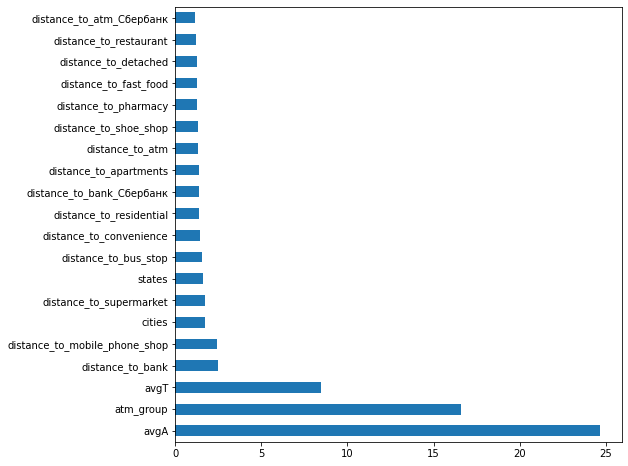

In [578]:
# оценка проводилась без StandardScaler
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
feat_importances = pd.Series(cb['model_'].feature_importances_, index=X_train.columns).nlargest(20).plot(kind='barh')

## Итог

In [697]:
metrics = pd.DataFrame({'model': ['LinearRegression', 'Ridge', 'ElasticNet', 'Tree', 
                        'Tree with GridSearchCV', 'KNN', 'SVR', 'Random Forest', 'Catboost'],
                        'R2':    [lr_r2_test, ridge_r2_test, en_r2_test, tree_r2_test, 
                                  gs_tree_r2_test, knn_r2_test, svr_r2_test, rf_r2_test, 
                                  cb_r2_test],
                        'MSE':   [lr_mse_test, ridge_mse_test, en_mse_test, tree_mse_test,
                                  gs_tree_mse_test, knn_mse_test, svr_mse_test, rf_mse_test, 
                                  cb_mse_test],
                        'RMSE':  [lr_rmse_test, ridge_rmse_test, en_rmse_test, tree_rmse_test,
                                  gs_tree_rmse_test, knn_rmse_test, svr_rmse_test, rf_rmse_test, 
                                  cb_rmse_test],
#                         'MAPE':  [lr_mape_test, ridge_mape_test, en_mape_test, tree_mape_test,
#                                   gs_tree_mape_test, knn_mape_test, svr_mape_test, rf_mape_test, cb_mape_test]
                        })

metrics.iloc[1:, 1:] = metrics.iloc[1:, 1:].applymap(lambda x: f'{x:.6f}')
norm_metrics = metrics.iloc[1:, :]
norm_metrics

,model,R2,MSE,RMSE
1,Ridge,0.728511,0.002024,0.044991
2,ElasticNet,0.661440,0.002524,0.050242
3,Tree,0.511687,0.003641,0.060339
4,Tree with GridSearchCV,0.730969,0.002006,0.044787
5,KNN,0.541658,0.003417,0.058458
6,SVR,0.577227,0.003152,0.056144
7,Random Forest,0.783308,0.001616,0.040195
8,Catboost,0.773343,0.001690,0.041109


## Методы снижения размерности

In [698]:
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif, SelectFromModel

In [699]:
pipe0 = Pipeline([
    ('selector_', SelectKBest(score_func=f_regression, k=100)), 
    ('model_', RandomForestRegressor())]
)

In [701]:
cv_res = cross_validate(pipe0, X_train, y_train, cv=5, scoring='r2', n_jobs=-1
                         return_train_score=True)
cv_res

{'fit_time': array([41.16766381, 37.1792202 , 35.71679616, 40.28412962, 34.11456776]),
 'score_time': array([0.04976273, 0.06561732, 0.08264041, 0.07729125, 0.11967039]),
 'test_score': array([0.77584419, 0.77564413, 0.75388566, 0.77208562, 0.74423228]),
 'train_score': array([0.96036009, 0.9600209 , 0.96094121, 0.96011142, 0.95977547])}

In [702]:
from sklearn.decomposition import PCA

pipe1 = Pipeline([
    ('selector_', PCA(n_components=110)), 
    ('model_', RandomForestRegressor(random_state=42))]
)

## Финальный pipeline модели

In [707]:
# данные предобрабатываются из БД
df = pd.read_csv('../data/expanded_data_with_OSM.csv', sep = ',')
df_target = pd.read_csv('../data/train.csv', sep = ',')

regions_data = pd.read_csv('../data/regions_data.csv', sep = ';').rename(columns={'Unnamed: 0': 'regions'})
df = df.merge(regions_data, how='left', on='regions')

df = df.merge(df_target[['id', 'target']], how='left', on='id')

dff = pd.DataFrame(df.isna().sum()/len(df)).reset_index()
dff = dff[dff[0] > 0]

for col in dff[dff[0] > 0]['index']:
    if col != 'regions':
        df[col] = df[col].fillna(df[col].max())

df['regions'].replace(np.nan, 'Southern Federal District', inplace=True)

df = df[df['test_train_flag'] == 'train']
df['capital'] = np.where((df['cities'] == 'Moscow') | (df['cities'] == 'Saint Petersburg'), 1, 0)

df = df.merge(df.groupby('cities').agg({'target': 'mean'}).reset_index().rename(columns={'target': 'avgC'}),
         how='left', on='cities')

df = df.merge(df.groupby('regions').agg({'target': 'mean'}).reset_index().rename(columns={'target': 'avgR'}),
         how='left', on='regions')

df = df.merge(df.groupby('states').agg({'target': 'mean'}).reset_index().rename(columns={'target': 'avgS'}),
         how='left', on='states')

df = df.merge(df.groupby('atm_group').agg({'target': 'mean'}).reset_index().rename(columns={'target': 'avgA'}),
         how='left', on='atm_group')


df['atm_group'] = df['atm_group'].astype(int)

y = df['target'].reset_index(drop=True)
X = df.loc[:, ~df.columns.isin(['target', 'id', 'address', 'address_rus', 'lat', 'lng',
                                'test_train_flag', 'geometry'])].reset_index(drop=True)

In [708]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [736]:
# import libraries
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import set_config

set_config(transform_output="pandas")

# pca = PCA(n_components=50)
pca = SelectKBest(score_func=f_regression, k=100)

# get the categorical and numeric column names
num_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# pipeline for numerical columns
num_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)
# pipeline for categorical columns
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)

# combine both the pipelines
full_pipe = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

# build the model
rff = Pipeline([
    ('coltrans', full_pipe),
    ('pca', pca),
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1))
])

# train the model
rff.fit(X_train, y_train)

# make predictions on the test set
y_pred = rff.predict(X_test)

# measure quality
r2_test = r2_score(y_test, y_pred)
mse_test = MSE(y_test, y_pred)
rmse_test = MSE(y_test, y_pred, squared=False)
# mape_test = MAPE(y_test, y_pred)


print(f"TEST: R2: {r2_test}, MSE: {mse_test}, \
RMSE: {rmse_test}")

TEST: R2: 0.7840559103741536, MSE: 0.0016100389298148434, RMSE: 0.040125290401626296


In [737]:
clf = rff[-1]
# making a pandas dataframe
data = list(zip(clf.feature_names_in_, clf.feature_importances_))
df_importances = pd.DataFrame(data, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
df_importances

,Feature,Importance
31,num__avgA,3.372994e-01
0,num__atm_group,3.156379e-01
28,num__avgC,9.800435e-02
9,num__distance_to_mobile_phone_shop,1.574106e-02
14,num__distance_to_bank_Росбанк,1.262276e-02
...,...,...
51,cat__cities_Maloyaroslavets,4.286328e-06
53,cat__cities_Naberezhnye Chelny,1.186140e-06
50,cat__cities_Luchegorsk,1.556823e-07
57,cat__cities_Nizhniy Kuranakh,6.158842e-08


In [738]:
cv_res = cross_validate(rff, X, y, cv=5, 
                        scoring='r2', n_jobs=-1, return_train_score=True, error_score='raise')
cv_res

{'fit_time': array([26.27552867, 26.5443933 , 23.70416045, 26.10352159, 26.21613717]),
 'score_time': array([0.22113562, 0.18112445, 2.65728283, 0.22547936, 0.21592665]),
 'test_score': array([0.75758619, 0.75165409, 0.7511676 , 0.7745748 , 0.73611165]),
 'train_score': array([0.95866012, 0.96012634, 0.95829881, 0.95772704, 0.9596965 ])}

In [739]:
import pickle 

with open('atm_best.pkl', 'wb') as f:
    pickle.dump(rff, f)